In [1]:
import pandas as pd

In [5]:
wines=pd.read_csv("WineQT.csv")

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
wines=wines.drop(labels=['Id'],axis=1)

In [11]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import stat

import pylab

ImportError: cannot import name 'stat' from 'scipy.stats' (c:\Users\Tiayo Durel\anaconda3\envs\mlproj\Lib\site-packages\scipy\stats\__init__.py)

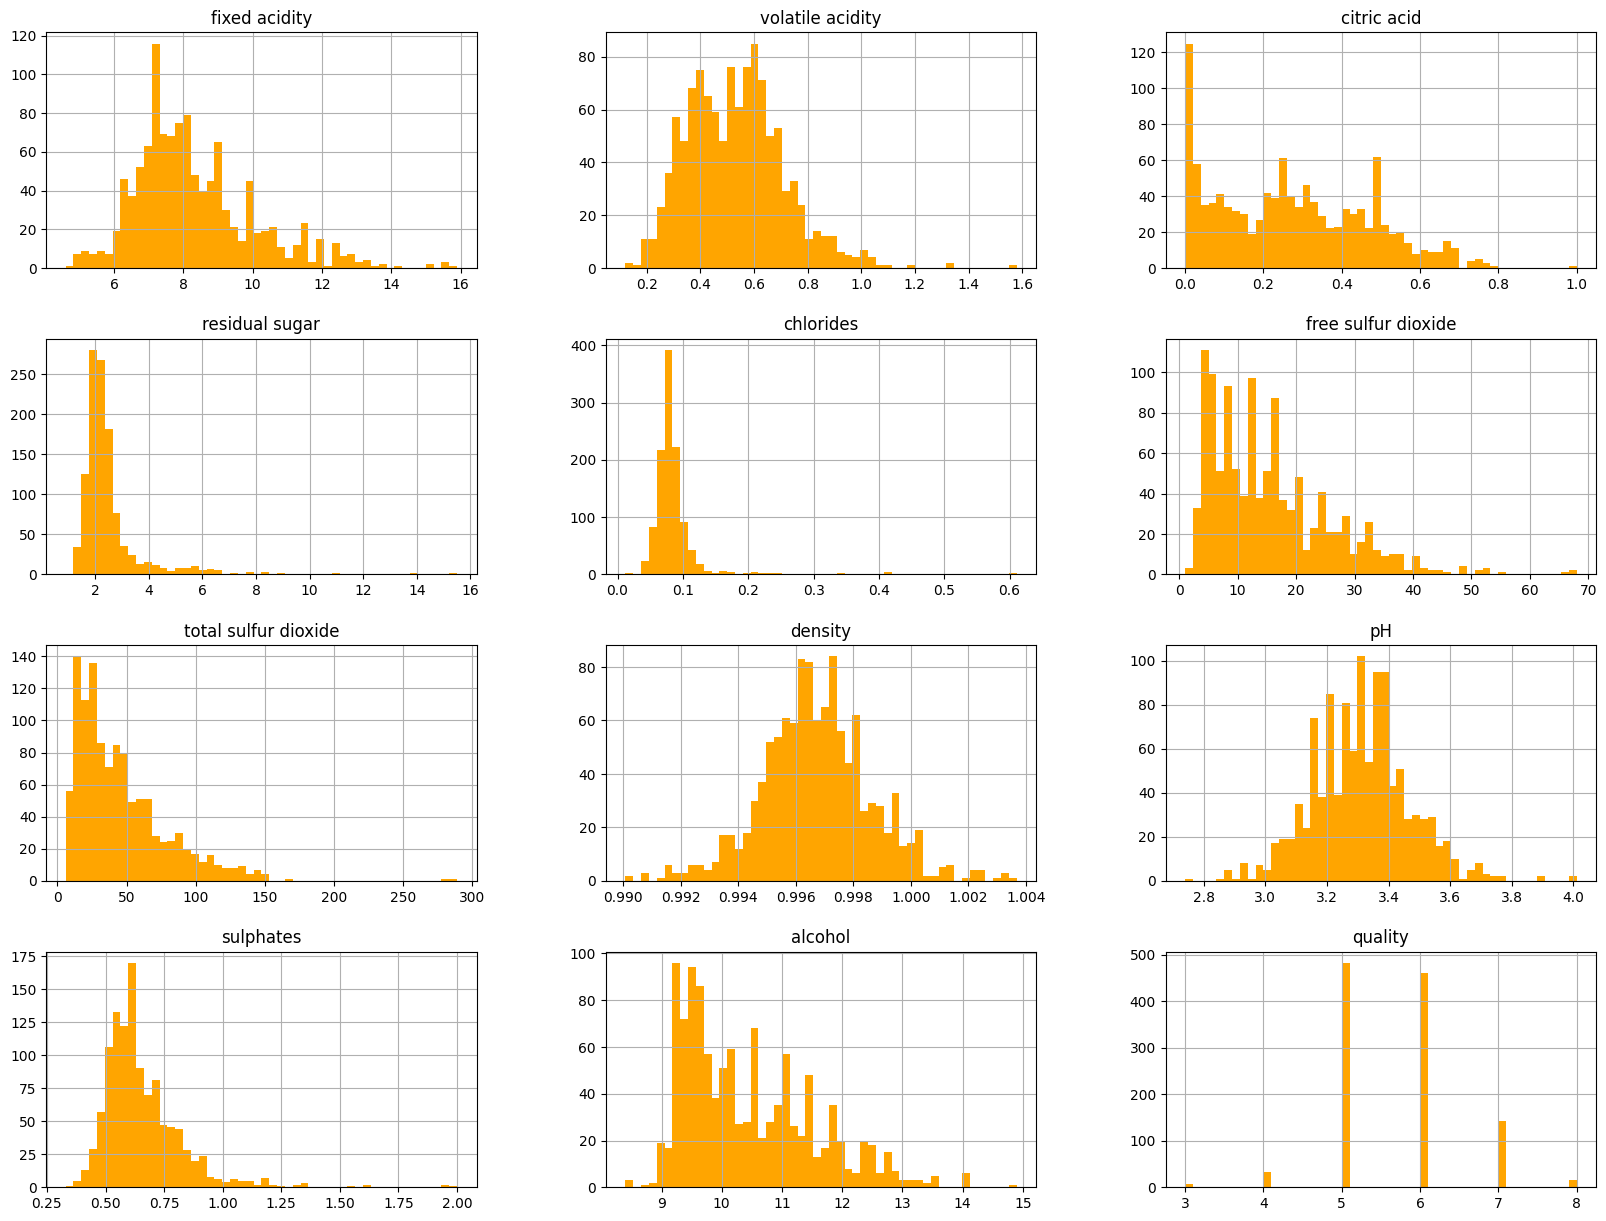

In [14]:
wines.hist(bins=50,figsize=(20,15),color="orange")
plt.show()

In [24]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

def qq_plot_single_column(data, column_name, title="", xlabel="", ylabel=""):
  """
  Creates a Q-Q plot comparing a single column from a dataset to a normal distribution.

  Args:
      data: A pandas DataFrame containing the data.
      column_name: The name of the column to be plotted.
      title: (Optional) The title for the plot. Defaults to "".
      xlabel: (Optional) The label for the x-axis. Defaults to "".
      ylabel: (Optional) The label for the y-axis. Defaults to "".
  """

  # Extract data from the column
  data_to_plot = data[column_name]

  # Generate Q-Q plot using probplot
  probplot(data_to_plot, dist="norm", plot=plt)

  # Add reference line for perfect fit
  plt.plot(data_to_plot.values, data_to_plot.values, linestyle="--", color="red", label="Theoretical Quantiles")

  # Customize plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()


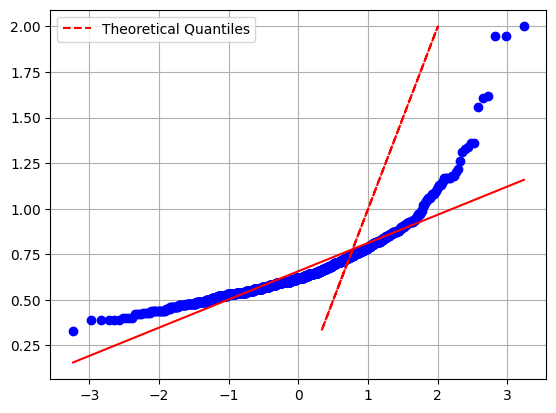

In [52]:
qq_plot_single_column(wines,'sulphates')

In [63]:
wines['sulphates_norm']=wines['sulphates']**(1/3)

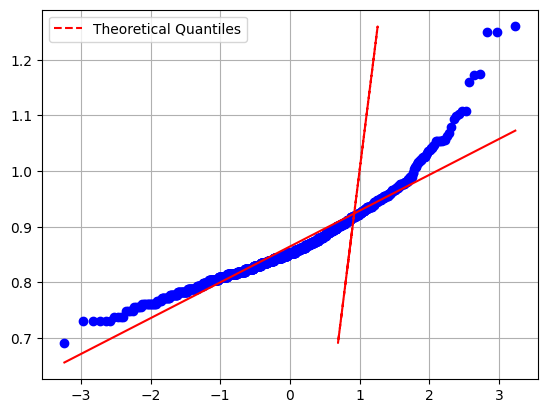

In [64]:
qq_plot_single_column(wines,'sulphates_norm')

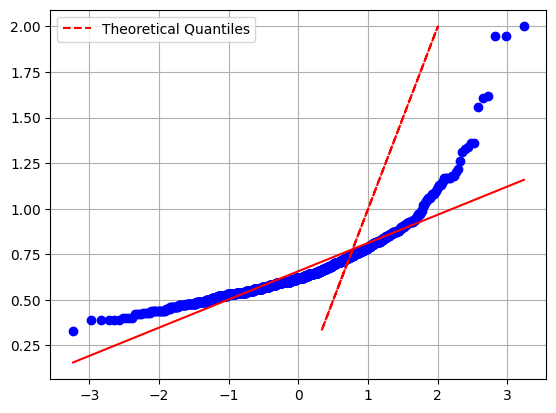

In [65]:
qq_plot_single_column(wines,'sulphates')

In [66]:
wines['sulphates_norm']=np.log(wines['sulphates'])

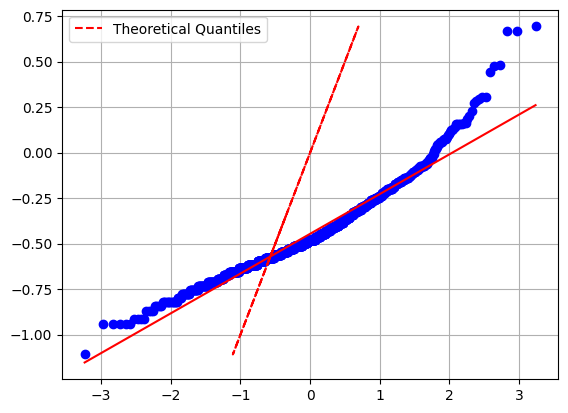

In [67]:
qq_plot_single_column(wines,'sulphates_norm')

In [41]:
wines['total sulfur dioxide_norm']=np.log(wines['total sulfur dioxide'])

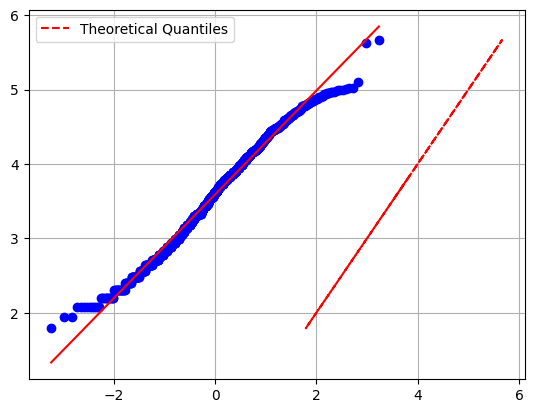

In [42]:
qq_plot_single_column(wines,'total sulfur dioxide_norm')

In [60]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'residualnorm',
       'chlorides_norm', 'total sulfur dioxide_norm', 'sulphates_norm',
       'free sulfur dioxide_norm'],
      dtype='object')

In [68]:
wines=wines.drop(labels=['chlorides','total sulfur dioxide','free sulfur dioxide','sulphates','residual sugar'],axis=1)

In [69]:
wines.head()

,fixed acidity,volatile acidity,citric acid,density,pH,alcohol,quality,residualnorm,chlorides_norm,total sulfur dioxide_norm,sulphates_norm,free sulfur dioxide_norm
0,7.4,0.70,0.00,0.9978,3.51,9.4,5,0.526316,-2.577022,3.526361,-0.579818,2.397895
1,7.8,0.88,0.00,0.9968,3.20,9.8,5,0.384615,-2.322788,4.204693,-0.385662,3.218876
2,7.8,0.76,0.04,0.9970,3.26,9.8,5,0.434783,-2.385967,3.988984,-0.430783,2.708050
3,11.2,0.28,0.56,0.9980,3.16,9.8,6,0.526316,-2.590267,4.094345,-0.544727,2.833213
4,7.4,0.70,0.00,0.9978,3.51,9.4,5,0.526316,-2.577022,3.526361,-0.579818,2.397895


In [70]:
wines.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [72]:
X=wines.drop(labels=['quality'],axis=1)
y=wines['quality']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(857, 11)
(286, 11)
(286,)
(857,)


In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [99]:
from sklearn.linear_model import ElasticNet

In [100]:
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=40)
lr.fit(X_train,y_trian)

ElasticNet(alpha=0.1, random_state=40)

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [102]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return r2,mae,rmse

In [103]:
pred_value=lr.predict(X_test)

In [104]:
rmse,mae,r2=eval_metrics(actual=y_test,pred=pred_value)

In [105]:
print(rmse,mae,r2)

0.3821868812640138 0.47383641090767564 0.5986542387193136


In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def tune_elastic_net(X_train, y_train, scoring="neg_mean_squared_error"):

  # Define hyperparameter grid
  param_grid = {
      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
      "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
  }

  elastic_net = ElasticNet(random_state=42)  # Set random state for reproducibility

  # Create GridSearchCV object
  grid_search = GridSearchCV(elastic_net, param_grid, scoring=scoring, cv=5)

  # Fit the grid search to the data
  grid_search.fit(X_train,y_train)

  # Return the best model
  return grid_search

# Example usage (assuming you have your training data)
grid_search = tune_elastic_net(X_train, y_train)

# Print the best model and its parameters
print("Best Model:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)

# Use the best model for prediction on new data (X_test)
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model performance on your test data


Best Model: ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42)
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.7}


In [108]:
lr=ElasticNet(alpha=0.01,l1_ratio=0.7,random_state=42)
lr.fit(X_train,y_trian)

ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42)

In [109]:
y_pred=lr.predict(X_test)

In [110]:
rmse,mae,r2=eval_metrics(actual=y_test,pred=y_pred)

In [111]:
print(rmse,mae,r2)

0.40905883748771654 0.4588921804817306 0.5854901861948979
